## DIAMOND PRICING MODEL

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv("C:/Users/HP/Desktop/diamonds.csv")

In [3]:
df.shape

(53940, 11)

In [4]:
'''
We intend knowing the stats of our dataset, especially the minimum values of diamond dimensions - volume(x,y and z column)
The minimum values of the dimensions x,y,z are 0s. This means some rows have dimensionless diamond. this is definitely an error,
as a dimensionless diamond doesn't worth price tags. Hence, we would remove these rows.
'''
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Removing the dimensionless diamond rows

df = df.drop(df[df['x']==0].index)
df = df.drop(df[df['y']==0].index)
df = df.drop(df[df['z']==0].index)

In [6]:
# checking the stats again, to be sure the rows were eliminated

df.describe() # it is clear from the output below - the zeros(0s) have been eliminated.

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [8]:
df.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53930,53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [9]:
df = df.drop("Unnamed: 0", axis = 1)

In [10]:
df.isnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(145)

In [13]:
 dup= df[df.duplicated()]

In [14]:
dup

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47296,0.30,Good,J,VS1,63.4,57.0,394,4.23,4.26,2.69
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [15]:
dup.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28


In [16]:
dup.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
47296,0.30,Good,J,VS1,63.4,57.0,394,4.23,4.26,2.69
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [17]:
#running this code would ensure i know longer have a duplicates in my dataframe
df.drop_duplicates(inplace=True)

In [18]:
#confirming there are no longer duplicates on my dataframe

df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(53775, 10)

<function matplotlib.pyplot.show(close=None, block=None)>

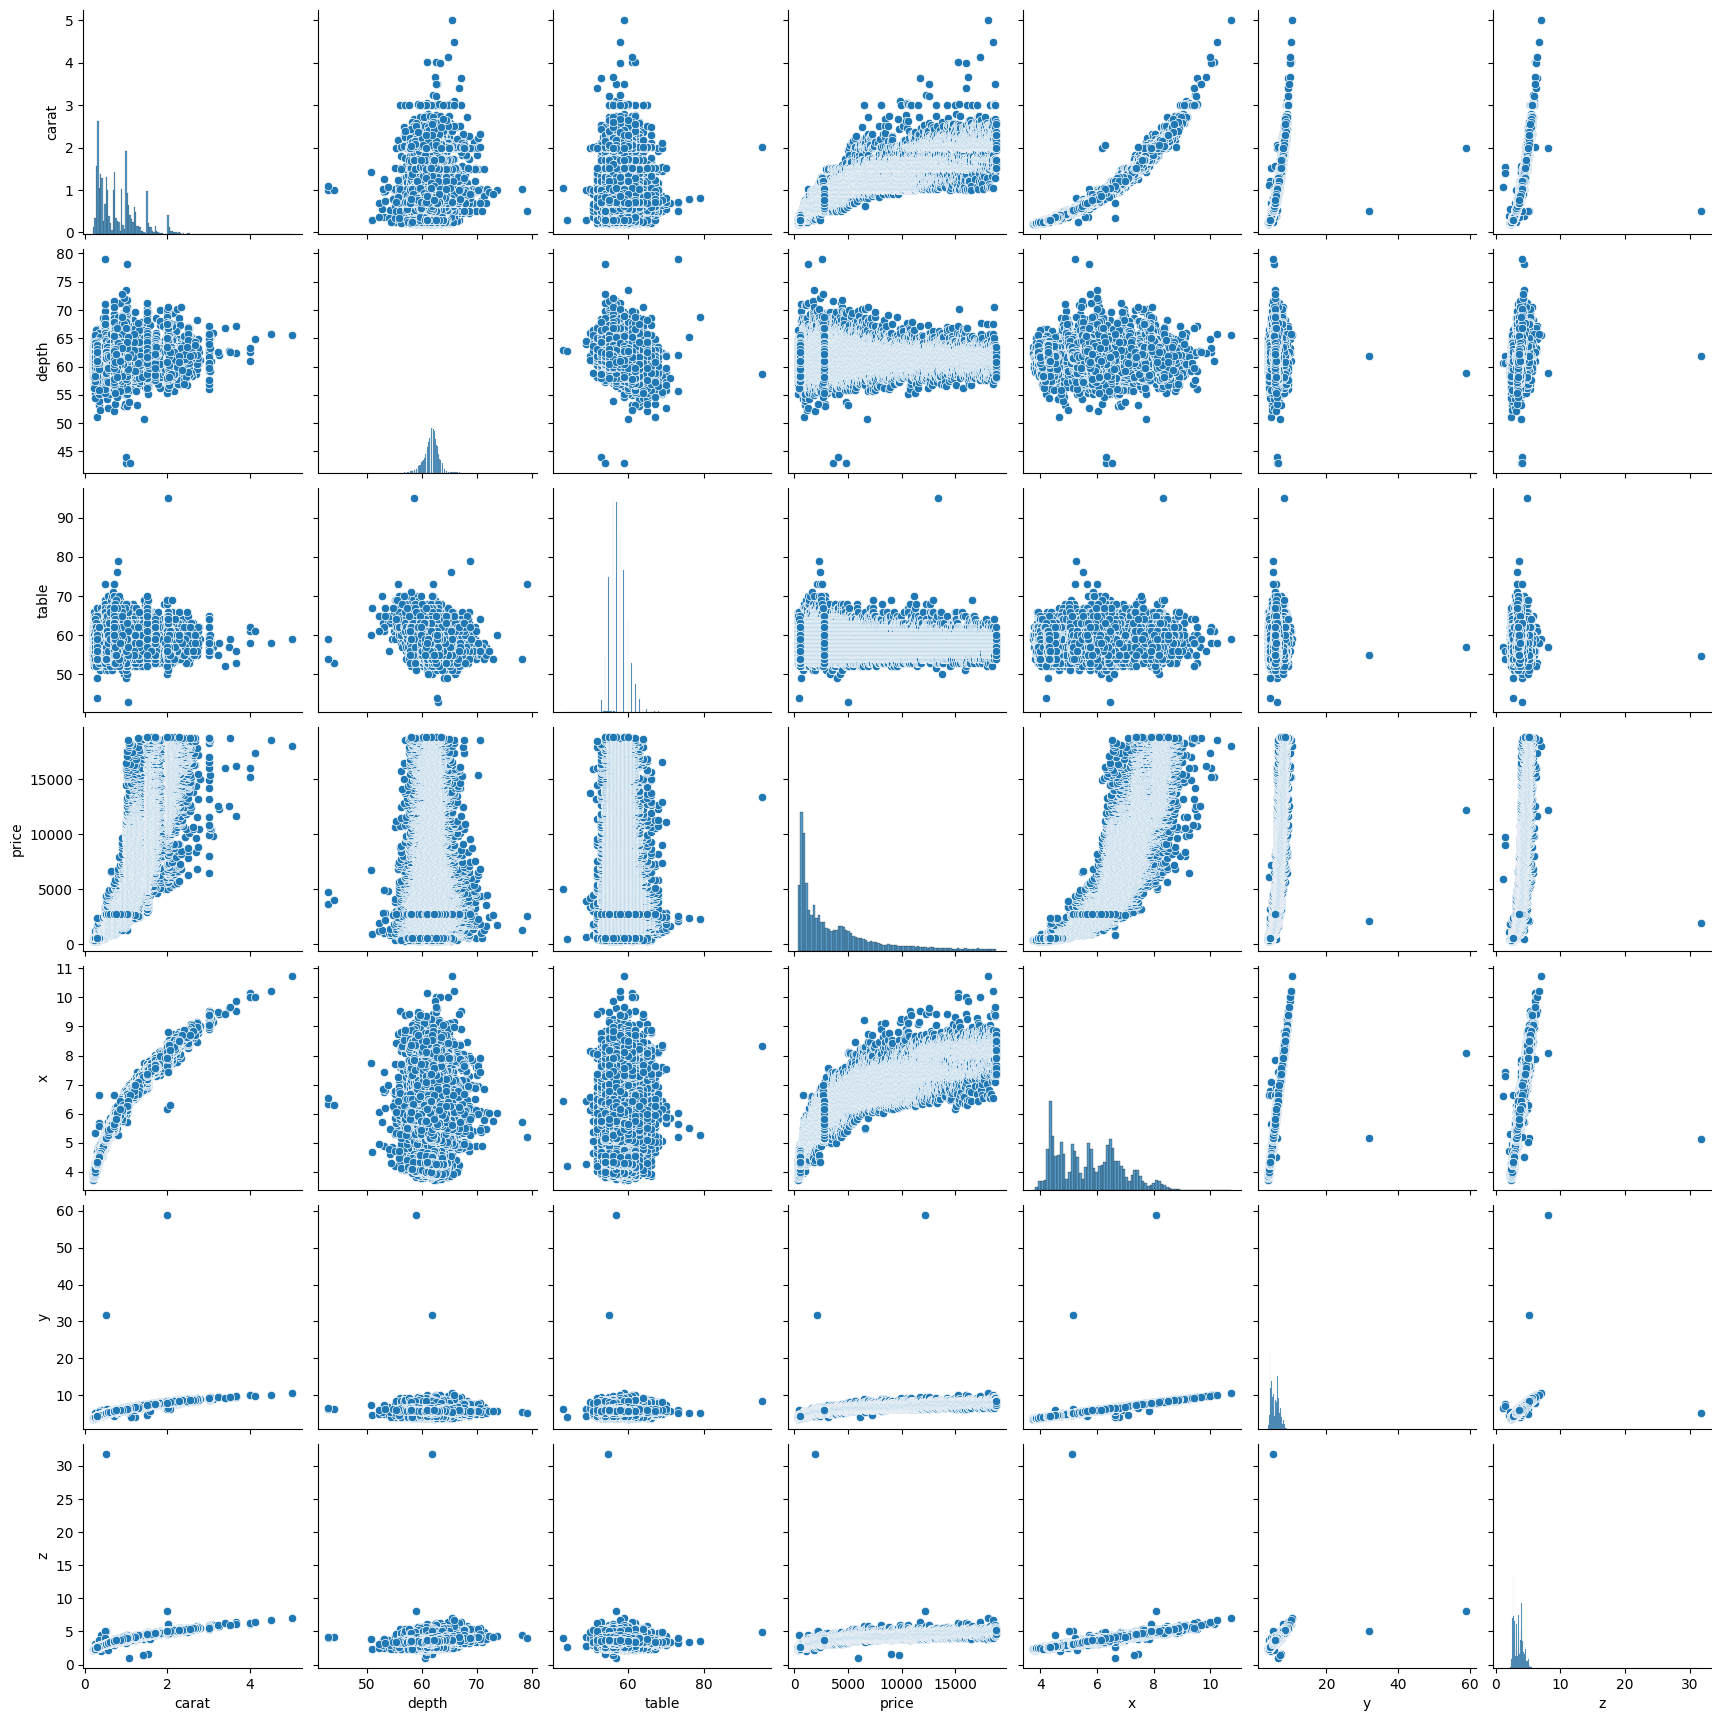

In [20]:
sns.pairplot(df)
plt.show

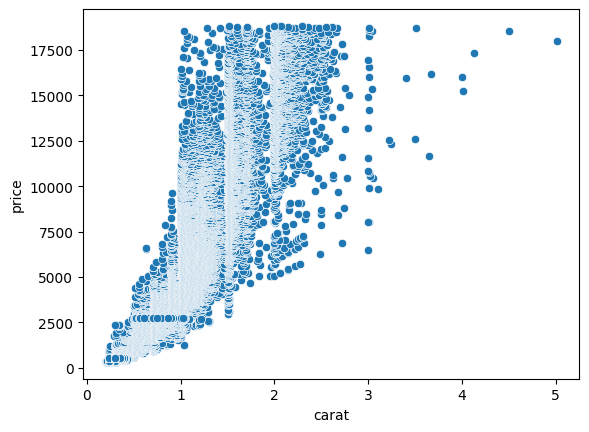

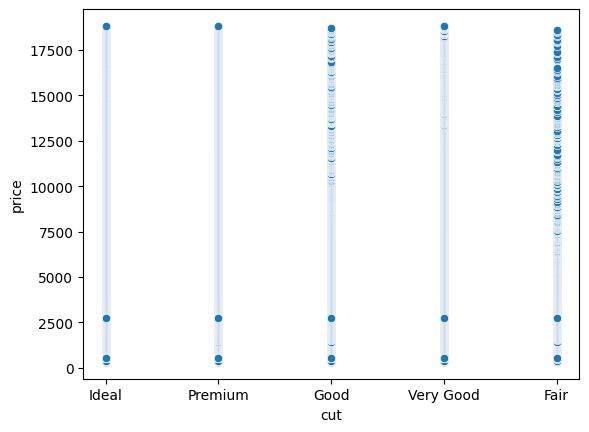

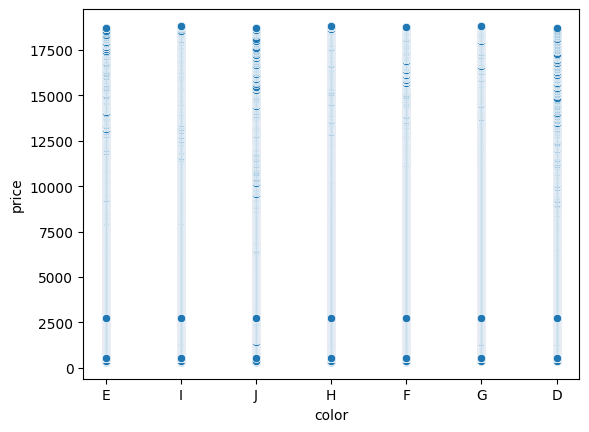

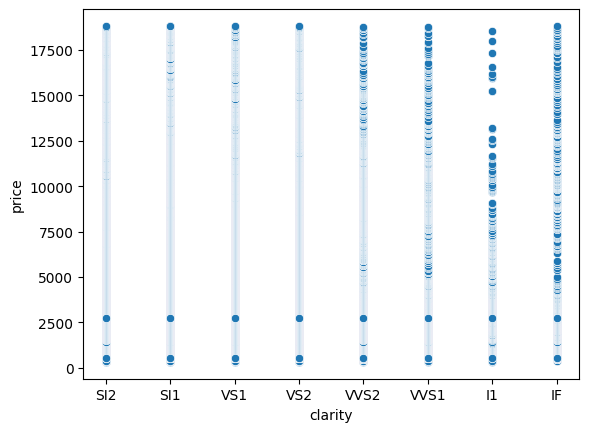

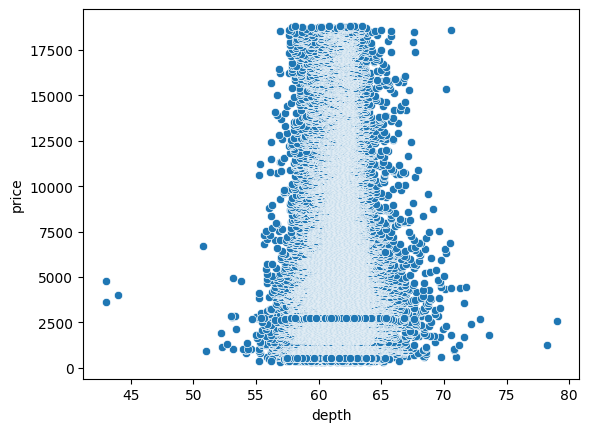

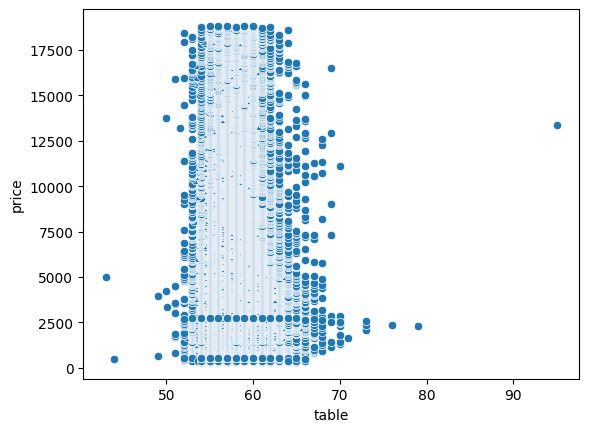

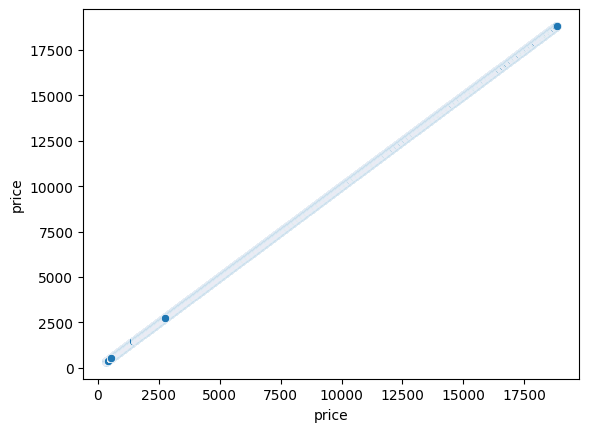

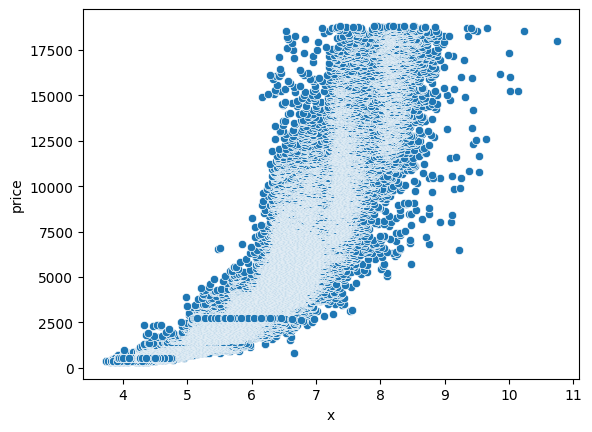

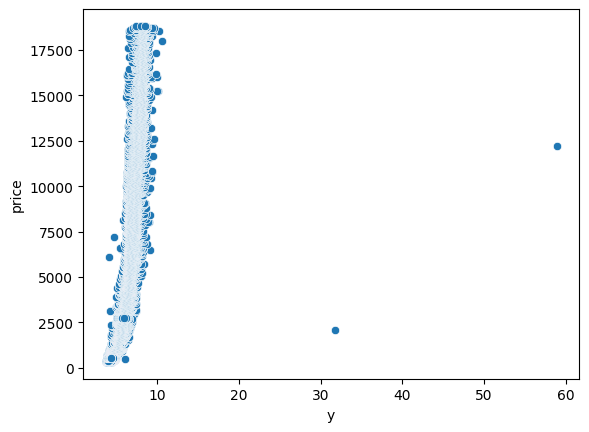

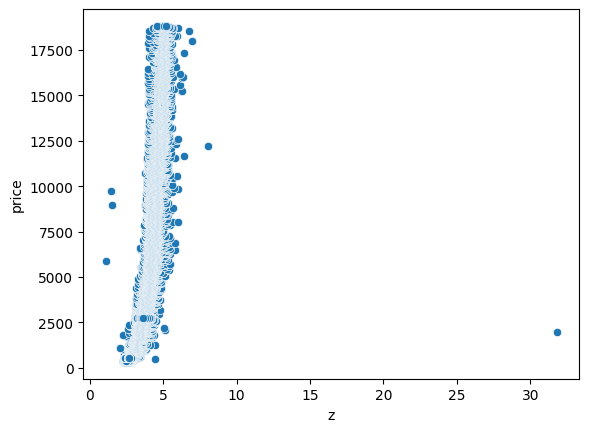

In [34]:
for col in df.columns:
    
    sns.scatterplot(data=df, x= col, y="price")
    plt.show()
    
    

<function matplotlib.pyplot.show(close=None, block=None)>

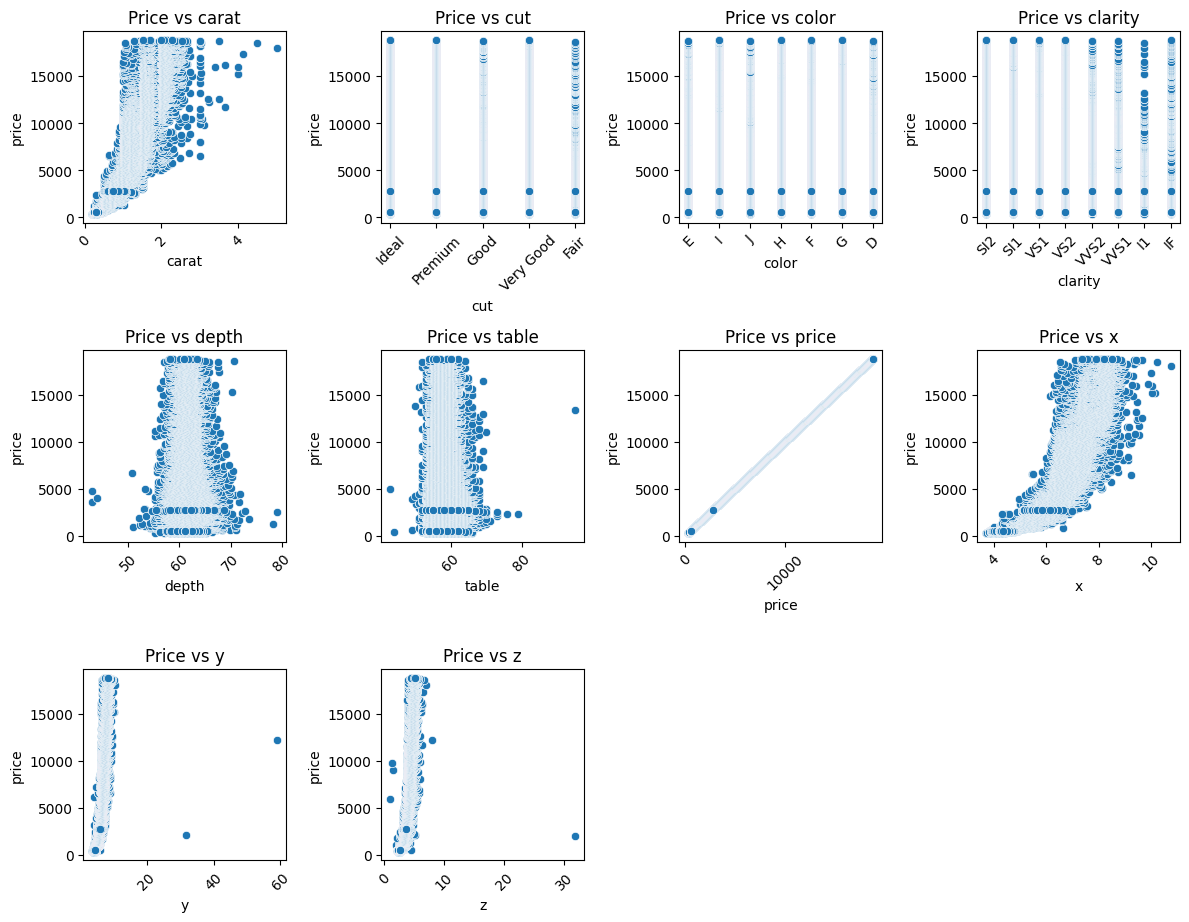

In [35]:
i = 0
plt.figure(figsize=(12,12))

for col in df.columns:
    i += 1
    plt.subplot(4, 4, i)
    sns.scatterplot(data=df, x = col, y = "price")
    plt.title(f"Price vs {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [36]:
'''following the pairplot above, there are a few outliers in our data,  so lets find a way to get rid of them,
so they don't impact our model negatively'''

outliers = pd.DataFrame()

for col in df.select_dtypes(include= "number").columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

# setting a lower boundary and upper boundary to ascertain outliers in our data

lower_boundary = Q1 - 1.5 * IQR
upper_boundary = Q3 + 1.5 * IQR

outliers_e = df[(df[col] < lower_boundary) | (df[col] > upper_boundary)] # the outliers, now lives in this variable

if not outliers_e.empty:
    outliers = pd.concat([outliers, outliers_e])
    
outliers.head(10) # below dataframe are the outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
14635,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07
16283,3.00,Very Good,H,I1,63.1,55.0,6512,9.23,9.10,5.77
17196,2.72,Fair,J,I1,68.2,56.0,6870,8.46,8.43,5.76
19346,3.00,Fair,H,I1,67.1,57.0,8044,8.93,8.84,5.97
21758,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
21862,3.01,Premium,F,I1,62.2,56.0,9925,9.24,9.13,5.73
22540,3.02,Fair,I,I1,65.2,56.0,10577,9.11,9.02,5.91
23539,3.00,Good,E,I1,64.2,65.0,11548,9.08,8.96,5.79
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06


In [37]:
df_c = df.drop(outliers.index)# The outliers has been removed from the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x800 with 0 Axes>

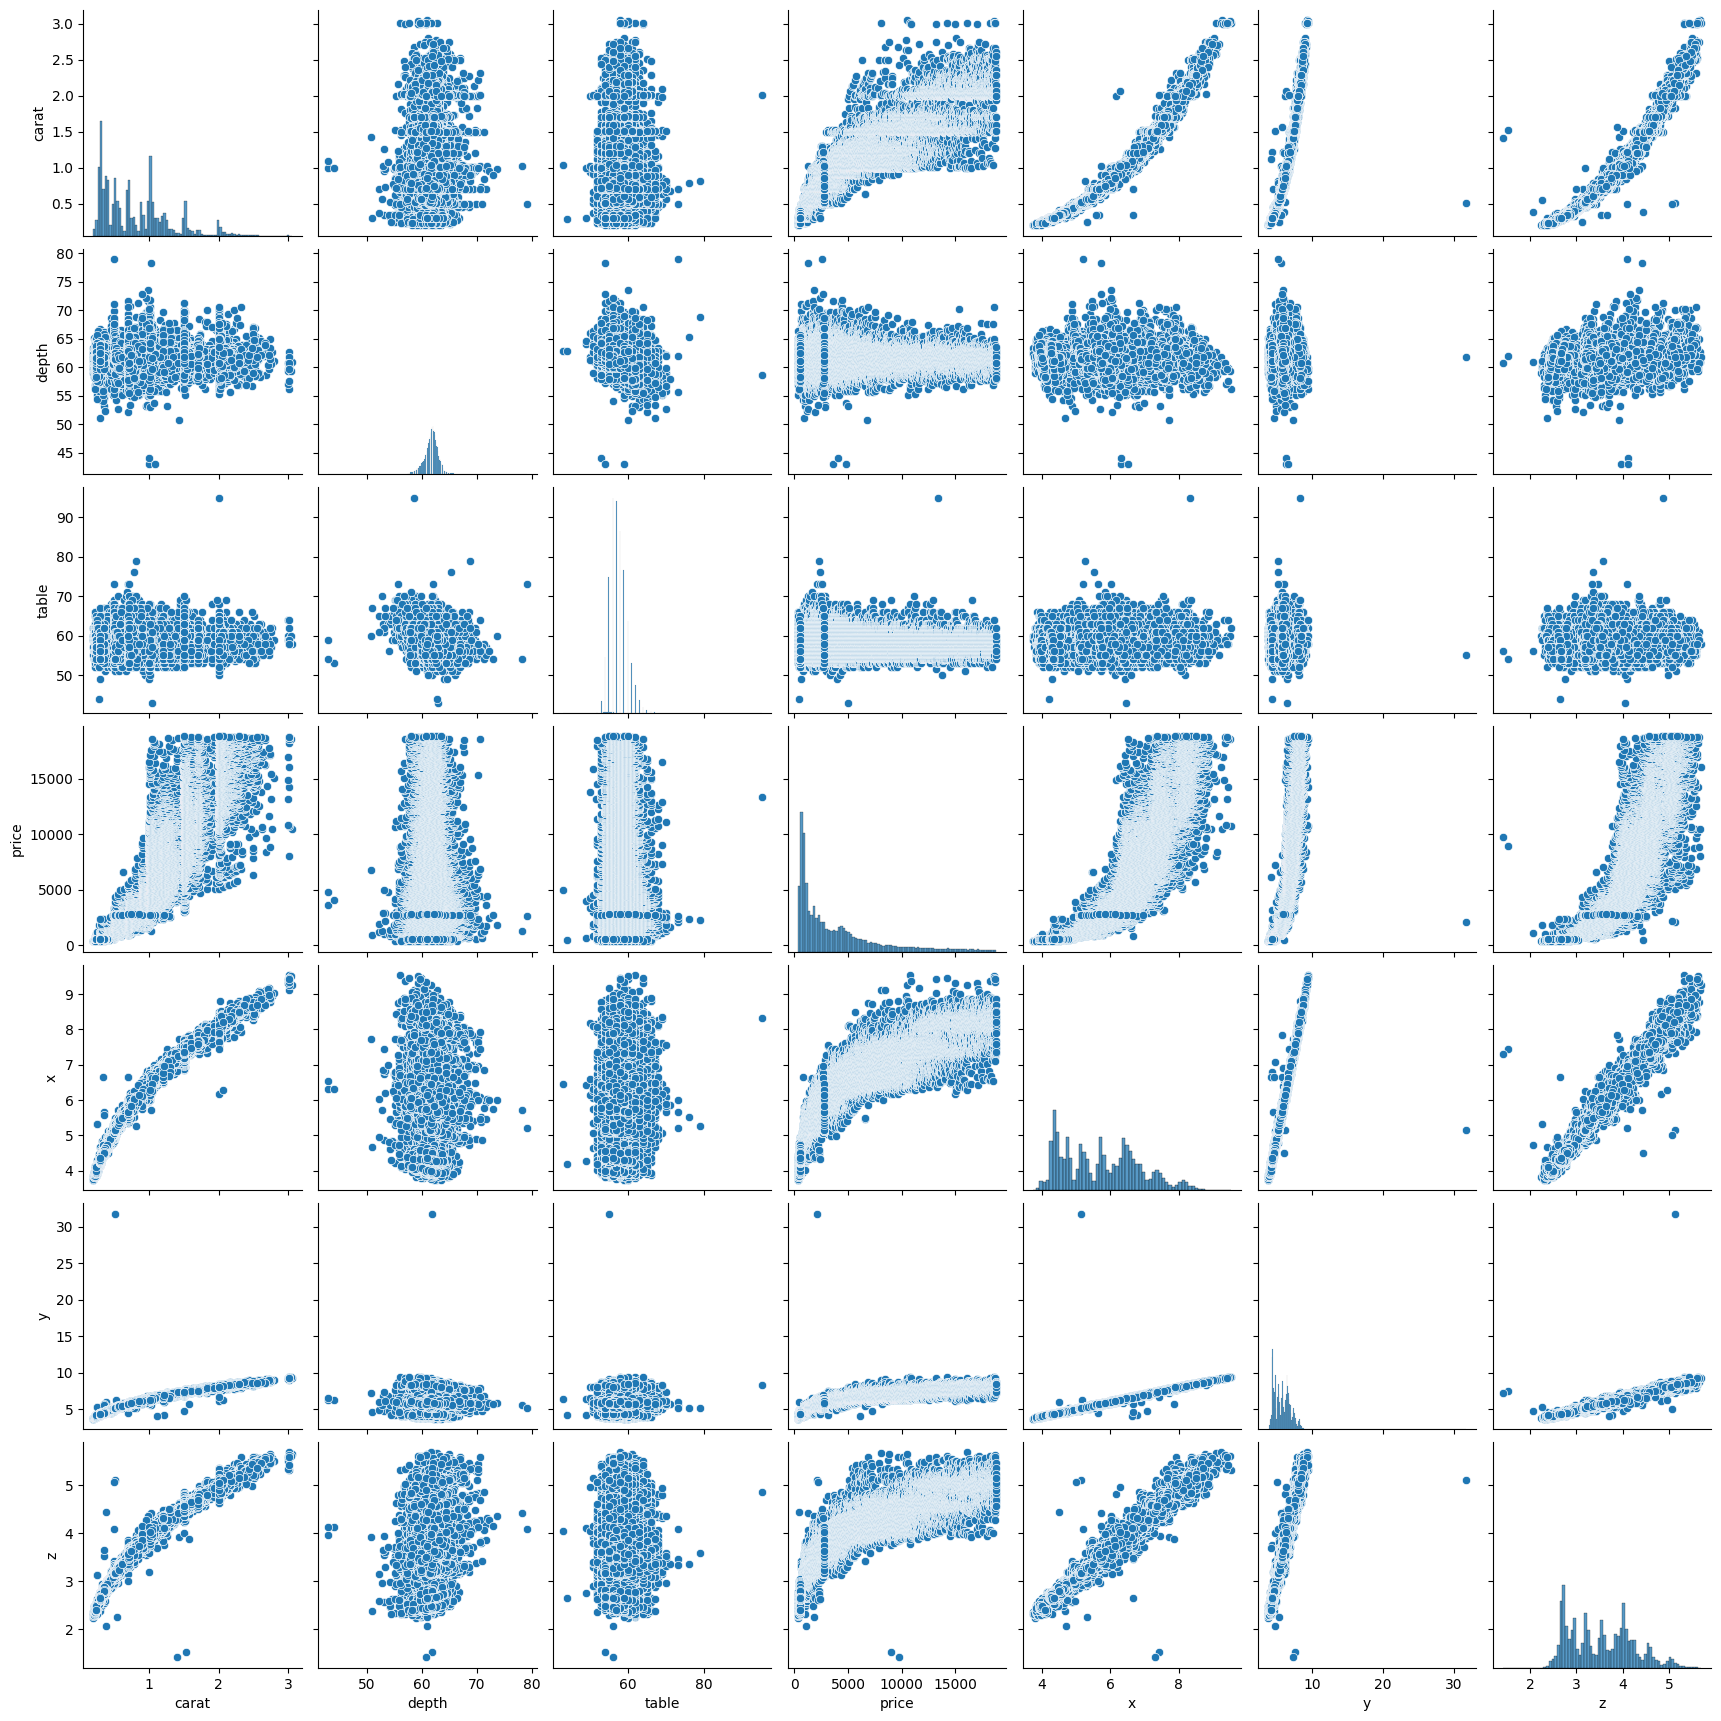

In [38]:
# We want to visualize our data again with pair plot, to confirm we no longer have outliers in the dataset

plt.figure(figsize=(10,8))
sns.pairplot(df_c)
plt.show

In [39]:
# Spelling out our categorical features i.e objects, so label encoding can be applied

cat_df = df.select_dtypes(include="object")
cat_df.columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [40]:
# we have some of our features to be object data types, so we need to encode for good interpretability by regression models
 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_df.columns:
    df_c[col]=le.fit_transform(df_c[col])

df_c.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [41]:
# we want to vet the correlation coeficients. Let us drop the non-numeric column before proceeding or apply one-hot encoder
 
corr_matrix = df_c.corr()

corr_matrix

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.020777,0.290153,-0.210921,0.023489,0.182084,0.923264,0.978944,0.972813,0.977381
cut,0.020777,1.000000,0.000891,0.027231,-0.191970,0.150834,0.041674,0.024076,0.029535,0.003074
color,0.290153,0.000891,1.000000,-0.027022,0.046789,0.025947,0.170648,0.269229,0.267246,0.273498
clarity,-0.210921,0.027231,-0.027022,1.000000,-0.051828,-0.087954,-0.069412,-0.223606,-0.219510,-0.227437
depth,0.023489,-0.191970,0.046789,-0.051828,1.000000,-0.297923,-0.013260,-0.028040,-0.030943,0.093477
table,0.182084,0.150834,0.025947,-0.087954,-0.297923,1.000000,0.126626,0.195796,0.188127,0.155408
price,0.923264,0.041674,0.170648,-0.069412,-0.013260,0.126626,1.000000,0.886944,0.883786,0.881935
x,0.978944,0.024076,0.269229,-0.223606,-0.028040,0.195796,0.886944,1.000000,0.993315,0.991210
y,0.972813,0.029535,0.267246,-0.219510,-0.030943,0.188127,0.883786,0.993315,1.000000,0.986839
z,0.977381,0.003074,0.273498,-0.227437,0.093477,0.155408,0.881935,0.991210,0.986839,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

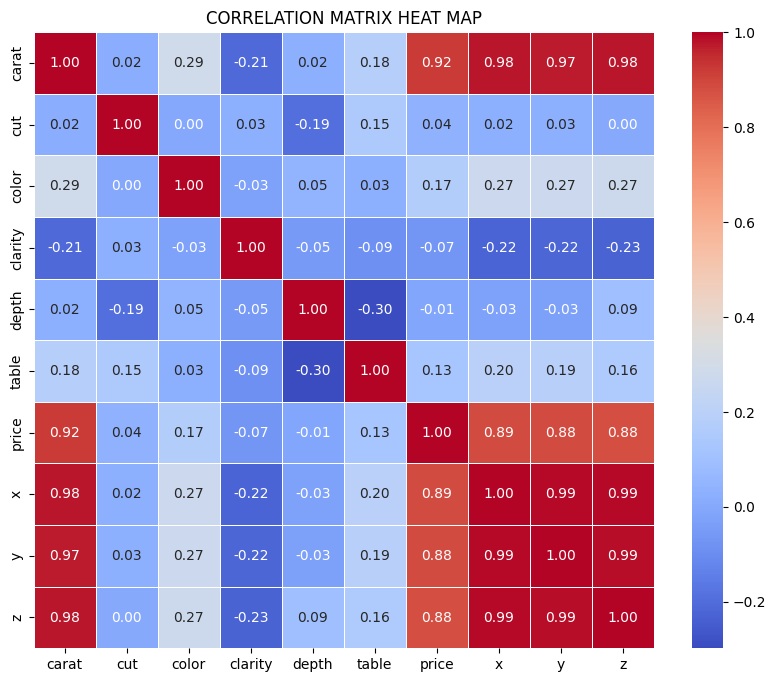

In [382]:
# Let us visualize the correlation matrix above

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot= True, cmap= "coolwarm", fmt= ".2f", linewidths = 0.5)
plt.title("CORRELATION MATRIX HEAT MAP")
plt.show

In [42]:
# Define your x and y for regression

X= df_c.drop("price", axis = 1)
y= df_c["price"]

In [43]:
# split your data for train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [44]:
# scaling our data

scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [45]:
lm= LinearRegression()

In [46]:
lm.fit(X_train, y_train)


LinearRegression()

In [47]:
y_pred= lm.predict(X_test)


In [48]:
comparison_df = pd.DataFrame({"Actual": y_test, "predicted": y_pred})
comparison_df

,Actual,predicted
36891,959,1004.931535
53449,2675,2968.560046
38281,487,581.426321
3648,3437,3670.710368
16719,610,788.790485
...,...,...
44557,1605,1885.284342
1110,2914,2979.660149
33369,827,270.036770
42510,1322,1093.277027


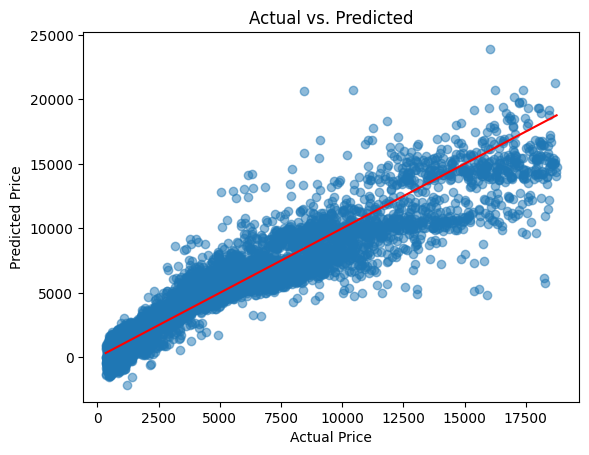

In [49]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # ideal line
plt.show()

In [50]:
# Evaluating the model

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error


In [51]:
r2= r2_score(y_test, y_pred)
r2

0.8981862777750614

In [52]:
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= root_mean_squared_error(y_test, y_pred)

print(f"r2 score: {r2:.2f}")
print(f"mean absolute error: {mae:.2f}")
print(f"mean squared error: {mse:.2f}")
print(f"root mean squared error: {rmse:.2f}")

r2 score: 0.90
mean absolute error: 823.45
mean squared error: 1583892.33
root mean squared error: 1258.53


In [53]:
# Checking for overfitting 

y_train_pred= lm.predict(X_train)
y_train_pred
pred_df= pd.DataFrame({"Actual":y_train, "predicted":y_train_pred})
pred_df

r2= r2_score(y_train, y_train_pred)
r2_= r2_score(y_test, y_pred)

print(f"r2 score train: {r2}") 
print(f"r2 score test_: {r2}")# r2 score for both train and test are the same as seen below, which subtly infers the model is generalising well

r2 score train: 0.889750424574251
r2 score test_: 0.889750424574251


In [54]:
mae_test= mean_absolute_error(y_test, y_pred)
mse_test= mean_squared_error(y_test, y_pred)
rmse_test= root_mean_squared_error(y_test, y_pred)
mae_train= mean_absolute_error(y_train, y_train_pred)
mse_train= mean_squared_error(y_train, y_train_pred)
rmse_train= root_mean_squared_error(y_train, y_train_pred)


print(f"mean absolute error test: {mae_test:.2f}")
print(f"mean absolute error train: {mae_train:.2f}")
print(f"mean squared error test: {mse_test:.2f}")
print(f"mean squared error train: {mse_train:.2f}")
print(f"root mean squared error test: {rmse_train:.2f}")
print(f"root mean squared error train: {rmse_test:.2f}")


mean absolute error test: 823.45
mean absolute error train: 845.53
mean squared error test: 1583892.33
mean squared error train: 1753964.10
root mean squared error test: 1324.37
root mean squared error train: 1258.53


# DEVELOPING WITH RAMDOM FOREST REGRESSION

In [55]:
model= RandomForestRegressor(n_estimators = 100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
y_rf_pred= model.predict(X_test)
rf_dframe= pd.DataFrame({"Actual": y_test, "Predicted": y_rf_pred })
rf_dframe

,Actual,Predicted
36891,959,952.59
53449,2675,2494.78
38281,487,489.40
3648,3437,3669.92
16719,610,641.74
...,...,...
44557,1605,1732.50
1110,2914,2787.57
33369,827,982.40
42510,1322,1489.01


In [57]:
r2_rf= r2_score(y_test, y_rf_pred)
mae_rf= mean_absolute_error(y_test, y_rf_pred)
mse_rf= mean_squared_error(y_test, y_rf_pred)
rmse_rf= root_mean_squared_error(y_test, y_rf_pred)

print(f"r2 score: {r2_rf}")
print(f"mean absolute error: {mae_rf}")
print(f"mean squared error: {mse_rf}")
print(f"root mean squared error: {rmse_rf}")

r2 score: 0.9818471348066139
mean absolute error: 267.1384848305648
mean squared error: 282399.8902425278
root mean squared error: 531.413106954023


In [58]:
# Let's see how it performed on the train data itself

y_train_rf_pred= model.predict(X_train)
y_train_rf_pred_df= pd.DataFrame({"Actual": y_train, "Predicted": y_train_rf_pred})
y_train_rf_pred_df

,Actual,Predicted
49724,2150,2266.48
22639,10688,10695.07
18642,7608,7312.44
5198,3780,3873.75
18227,7400,7337.09
...,...,...
11318,4986,5098.66
44914,1631,1624.47
38316,1019,1036.54
860,2871,2895.79


In [59]:
r2_train_rf= r2_score(y_train, y_train_rf_pred)
mae_train_rf= mean_absolute_error(y_train, y_train_rf_pred)
mse_train_rf= mean_squared_error(y_train, y_train_rf_pred)
rmse_train_rf= root_mean_squared_error(y_train, y_train_rf_pred)


print(f"r2 score: {r2_train_rf}")
print(f"mean absolute error: {mae_train_rf}")
print(f"mean squared error: {mse_train_rf}")
print(f"root mean squared error: {rmse_train_rf}")

# following the result of the train r2 below compared to the test r2, it infers that the model generalised well. Hence, not overfitting.

r2 score: 0.9972987695576805
mean absolute error: 100.65189247200183
mean squared error: 42973.963344300704
root mean squared error: 207.3016240754054


In [61]:
import pickle

with open("Diamond_price_pred.pkl", 'wb') as file:
    pickle.dump(model, file)
    
